# 导入所需库
导入必要的库，如NumPy、Matplotlib、SciPy和scikit-image。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import io, img_as_float
from skimage.util import random_noise

# 读取并显示原始图像
读取一幅灰度图像并显示。

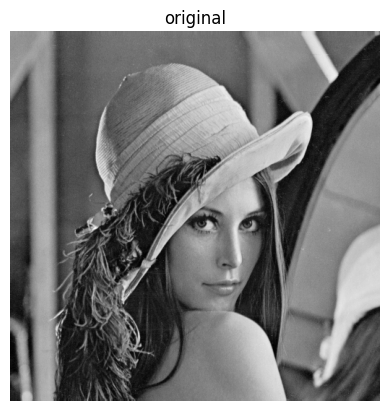

In [8]:
# 读取并显示原始图像
pic = io.imread('lenna.jpg', as_gray=True)  # 读取灰度图像
plt.imshow(pic, cmap='gray')
plt.title('original')
plt.axis('off')
plt.show()

# 图像运动模糊退化模型
实现图像运动模糊退化模型的函数。

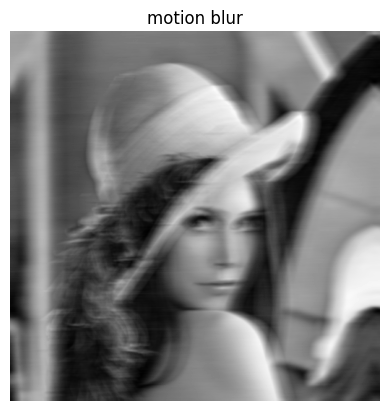

In [ ]:
# 图像运动模糊退化模型函数
def motion_blur_kernel(length, angle):
    kernel = np.zeros((length, length))
    kernel[int((length - 1) / 2), :] = np.ones(length)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    center = (length - 1) / 2
    # 旋转矩阵
    for i in range(length):
        for j in range(length):
            offset = np.array([i - center, j - center])
            rotated_offset = np.dot(rotation_matrix, offset)
            if np.abs(rotated_offset[1]) < 0.5:
                kernel[i, j] = 1
    return kernel / np.sum(kernel)

# 生成运动模糊图像
def apply_motion_blur(image, length, angle):
    H_motion = motion_blur_kernel(length, np.deg2rad(angle))
    motion_blur_image = convolve(image, H_motion)
    return motion_blur_image

# 显示
length = 28
angle = 90
motion_blur_image = apply_motion_blur(pic, length, angle)
plt.imshow(motion_blur_image, cmap='gray')
plt.title('motion blur')    
plt.axis('off')
plt.show()

# 生成并显示运动模糊图像
使用不同的a和b参数生成运动模糊图像并显示。

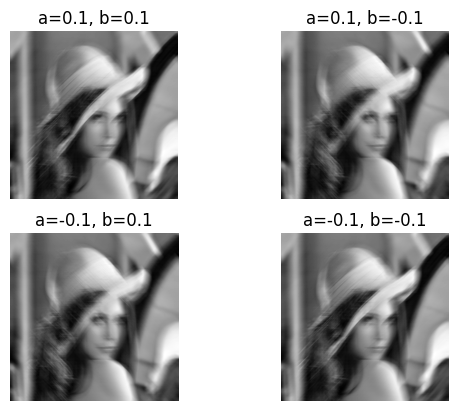

In [4]:
# 生成并显示运动模糊图像
# 使用不同的a和b参数生成运动模糊图像并显示

# 定义不同的a和b参数组合
params = [(0.1, 0.1), (0.1, -0.1), (-0.1, 0.1), (-0.1, -0.1)]

# 生成并显示运动模糊图像
plt.figure('不同参数的运动模糊图像')
for i, (a, b) in enumerate(params):
    angle = np.arctan2(b, a) * 180 / np.pi  # 计算角度
    motion_blur_image = apply_motion_blur(pic, length, angle)
    plt.subplot(2, 2, i + 1)
    plt.imshow(motion_blur_image, cmap='gray')
    plt.title(f'a={a}, b={b}')
    plt.axis('off')

plt.show()

# 添加高斯噪声
给运动模糊图像添加均值为零，方差为0.01的高斯噪声。

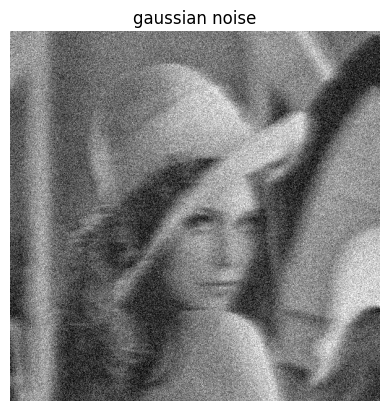

In [10]:
# 添加高斯噪声
# 给运动模糊图像添加均值为零，方差为0.01的高斯噪声
noisy_image = random_noise(motion_blur_image, mode='gaussian', mean=0, var=0.01)

# 显示添加高斯噪声后的图像
plt.figure('gaussian noise')
plt.imshow(noisy_image, cmap='gray')
plt.title('gaussian noise')
plt.axis('off')
plt.show()